In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


1 Creare un DataFrame da questo file json ed assegnarlo ad una variabile df.

In [ ]:

df = pd.read_json('https://raw.githubusercontent.com/CappuCitti/Python-appunti-ed-esercizi/main/MatPlotLib/Data/sample_chat_data.json')
df




,user_id,message_length,device_type,has_media,has_links,full_date
0,9a0f4@kp,43,android,False,False,2021-11-10T20:09:29.209Z
1,f6627@kp,0,android,False,False,2021-11-10T20:13:24.176Z
2,f6627@kp,38,android,False,False,2021-11-10T20:13:36.119Z
3,f6627@kp,33,android,False,False,2021-11-10T20:13:49.332Z
4,f9a56@kp,0,android,True,False,2021-11-10T20:17:00.923Z
...,...,...,...,...,...,...
213,f6627@kp,24,android,False,False,2021-11-16T07:09:05.402Z
214,9609a@kp,2,android,False,False,2021-11-16T07:09:33.219Z
215,f9a70@kp,37,ios,False,False,2021-11-16T19:46:42.982Z
216,f6627@kp,14,android,False,False,2021-11-16T19:58:27.852Z


In [ ]:
df.info() #serve per capire i valori

2. Creare un grafico a barre che mostri il numero di messaggi inviato da ogni utente in ordine decrescente, avente le seguenti caratterisiche:
I tick dell'asse delle ascisse siano inclinati di 45°
Un titolo appropirato che descriva il grafico
Impostare il colore royalBlue per colorare le barre
 Ingrandire le dimenrsioni del grafico e del testo del 50% (figsize default: [6.4, 4.8], font.size default: 10)

In [ ]:
msg_num = df.groupby('user_id',as_index=False).count().sort_values('full_date' , ascending = False )
msg_num

,user_id,message_length,device_type,has_media,has_links,full_date
6,9a0f4@kp,57,57,57,57,57
1,9609a@kp,54,54,54,54,54
0,92a44@kp,20,20,20,20,20
2,96121@kp,17,17,17,17,17
13,f9a56@kp,17,17,17,17,17
9,f6627@kp,13,13,13,13,13
12,f9756@kp,9,9,9,9,9
10,f76a0@kp,5,5,5,5,5
11,f9742@kp,5,5,5,5,5
14,f9a70@kp,5,5,5,5,5


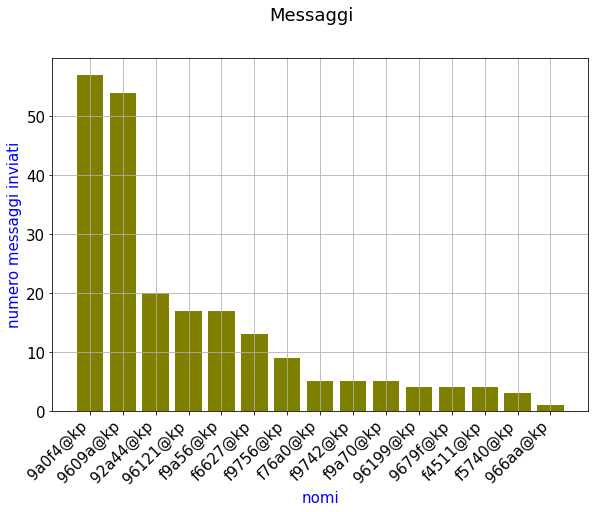

In [ ]:
plt.rcParams.update({"font.size": 15 })

fig = plt.figure(figsize=(9.6,7.2)) #crea figura
ax = plt.axes() #crea assi 

ax.bar(msg_num["user_id"],msg_num["full_date"], color = "olive") 

fig.suptitle("Messaggi")
ax.set_xlabel('nomi',color = "b")
ax.set_ylabel('numero messaggi inviati',color = "b")
ax.grid() ##griglia


fig.autofmt_xdate(rotation=45) ##ruotare le scritte sull asse x del grafico

plt.show()


In [ ]:
#come fare la media
msg_num["full_date"].mean()
msg_num[msg_num["full_date"] > msg_num["full_date"].mean()]["user_id"] ##maggiore dellam media
msg_num[msg_num["full_date"] == msg_num["full_date"].max()]["user_id"] #utente con numero maggiore

6    9a0f4@kp
Name: user_id, dtype: object

3. Creare un grafico a torta che riporti la media totale dei messaggi inviati suddivisi per giorni avente le seguenti caratteristiche:
L'angolo 0 deve partire da una inclinazione di 90°
Mettere in esposizione la fetta del grafico che assuneme il minor valore percentuale
Utilizzando come riferimento questo NoteBook scegliere 7 colori diversi per ogni giorno della settimana ed utilizzarli per colorare le fette del grafico
Impostare come valori delle label del grafico il giorno di riferimento con il seguente fromato gg-mm-aaaa

In [ ]:
df['full_date'] = pd.to_datetime(df["full_date"]) #cambiare il dataframe modificando e aggiustando il formato
df["full_date"].dt.date


0      2021-11-10
1      2021-11-10
2      2021-11-10
3      2021-11-10
4      2021-11-10
          ...    
213    2021-11-16
214    2021-11-16
215    2021-11-16
216    2021-11-16
217    2021-11-16
Name: full_date, Length: 218, dtype: object

In [ ]:
data = df.groupby(df["full_date"].dt.date).count()
data


,user_id,message_length,device_type,has_media,has_links,full_date
full_date,,,,,,
2021-11-10,10,10,10,10,10,10
2021-11-11,34,34,34,34,34,34
2021-11-12,62,62,62,62,62,62
2021-11-13,2,2,2,2,2,2
2021-11-14,41,41,41,41,41,41
2021-11-15,56,56,56,56,56,56
2021-11-16,13,13,13,13,13,13


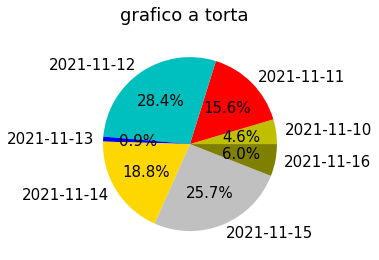

In [ ]:
fig = plt.figure()
ax = plt.axes()

fig.suptitle("grafico a torta")
ax.pie(data["user_id"],labels=data.index,autopct='%1.1f%%',colors=["y","r","c","b","gold","silver","olive"])
plt.show()

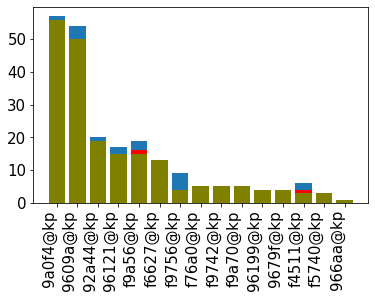

In [ ]:
data = df.groupby('user_id').agg({'message_length' : 'count',"has_media": 'sum','has_links': 'sum'}).sort_values('message_length',ascending = False)
labels = data.index
msgs= np.subtract(data["message_length"], np.subtract(data['has_media'],data["has_links"]))
msgs_links = data["has_links"]
msgs_media = data['has_media']
fig = plt.figure()
ax = plt.axes()
ax.bar(labels,msgs,color = "olive")
ax.bar(labels,msgs_links,bottom=msgs,color = "r") #bottom è il fondo di quel grafico che inizia da dove finice message
ax.bar(labels,msgs_media,bottom= np.add(msgs,msgs_links))
fig.autofmt_xdate(rotation=90)  
data
plt.show()